#**Detección de Medicamentos con Mayor Riesgo de Desabastecimiento**
#**Dataset: Medicamentos vitales no disponibles (Datos Abiertos Colombia)**

Integrantes del Grupo:

**Oscar Silva - 2220087**

**Edgar Ramirez- 2220101**

#**Introducción:**

El acceso a medicamentos vitales es algo fundamental para garantizar la salud pública y el bienestar de todos. Sin embargo, la disponibilidad de estos medicamentos puede verse comprometida por distintas causas. Este análisis se enfoca en un dataset que recoge información sobre la no disponibilidad de medicamentos esenciales según diferentes diagnósticos, con el objetivo de identificar patrones y, a través de este estudio, poder crear una IA que pueda preveer esta falta de medicamentos, y de esta manera poder tomar accion.


#**Motivación:**

El acceso a medicamentos es un pilar fundamental para la salud pública, pero en Colombia, el desabastecimiento de ciertos fármacos no vitales sigue siendo un problema recurrente. Aunque algunos de estos medicamentos no son esenciales para la supervivencia inmediata, su escasez puede afectar significativamente la calidad de vida de miles de personas, generando costos adicionales para los pacientes y presión sobre el sistema de salud.

Este proyecto busca utilizar la inteligencia artificial para anticipar posibles desabastecimientos, permitiendo a farmacias, distribuidores y autoridades de salud tomar medidas preventivas. Al analizar patrones históricos de consumo, factores económicos y datos logísticos, podemos desarrollar un sistema de alerta temprana que optimice la disponibilidad de medicamentos y reduzca el impacto negativo en la sociedad.

Con esta iniciativa, no solo mejoramos la eficiencia del sector farmacéutico, sino que también contribuimos al bienestar de la población, asegurando que los medicamentos no vitales estén accesibles cuando más se necesiten.

#**Objetivo:**
Desarrollar un modelo de inteligencia artificial que analice datos de consumo, precios y logística para predecir el riesgo de desabastecimiento de medicamentos no vitales en Colombia, permitiendo a farmacias, distribuidores y autoridades de salud tomar decisiones preventivas y optimizar su disponibilidad.

#**Información del Dataset:**

- Ministerio de Salud y Protección Social de Colombia. (n.d.). Medicamentos vitales no disponibles. Recuperado de https://www.datos.gov.co/Salud-y-Protecci-n-Social/MEDICAMENTOS-VITALES-NO-DISPONIBLES/sdmr-tfmf/about_data

Dentro del dataset se puede presenciar una lista de diagnósticos para diferentes enfermedades con fecha y código, junto a indicación del nombre del medicamento necesario para el tratamiento junto con su concentración, forma, medida, principio activo, y cantidad solicitada por cada entidad de salud.

De modo que los datos o variables que nos interesan para nuestro analisis son las siguientes:

- **FECHA_DE_AUTORIZACIÓN**: Se detalla en esta casilla, la fecha en que se genero la autorización. (Marca de tiempo variable)

- **TIPO_DE_SOLICITUD**: Se detalla en esta casilla, si el trámite autorizado fue para un paciente específico o para varios pacientes. (Texto)

- **SOLICITANTE/IMPORTADOR**: Nombre de la empresa importador a quien se le emite la autorización de importación. (Texto)

- **IUM**: Identificador único de medicamento, acorde a la Resolución 3166 de 2015. (Texto)

- **PRINCIPIO_ACTIVO1**: Princinpio activo del medicamento autorizado. (Texto)

- **CONCENTRACIÓN_DELMEDICAMENTO1**: Relación entre la cantidad de soluto y la cantidad de disolución o de disolvente. Puede ser expresada en peso o volumén. (Texto)

- **UNIDAD_MEDIDA1**: Cantidad estandarizada expresada en el sistema internacional de medida. (Texto)

- **PRINCIPIO_ACTIVO2**: En casos que aplica, es decir, combinaciones de principio activo en un mismo medicamento. (Texto)

- **CONCENTRACIÓN_DEL_MEDICAMENTO2**: Relación entre la cantidad de soluto y la cantidad de disolución o de disolvente. Puede ser expresada en peso o volumén. (Texto)

- **UNIDAD_MEDIDA2**: Cantidad estandarizada expresada en el sistema internacional de medida. (Texto)

- **FORMA_FARMACÉUTICA**: Forma final del medicamento, directamente relacionado con la vía de administración, fabricación y dosificación. (Texto)

- **NOMBRE_COMERCIAL_**: Nombre con el que se comercializa el producto. (Texto)

- **CANTIDAD_SOLICITADA**: Número de unidades aprobadas. (Número)

- **PRESENTACIÓN_COMERCIAL**: Número de unidades de contenido en un mismo empaque. (Texto)

- **DIAGNOSTICO_CIE-1NO REPORTA**: Enfermedad o patología para la que indicando el medicamento autorizado. (Texto)
- **CÓDIGO_DIAGNOSTICO_CIE-10**: Código del diagnostico en CIE10 c_digo_diagnostico_cie_10 (Texto)


##**Descripciones**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.__version__
from sklearn.metrics import *

#Base de datos a fecha del 2025/03/09
file_id = "12vy24ibJZfTBouDbbidHt2K3IWHHaujvnJeBB6vvdMU"

url = f"https://docs.google.com/spreadsheets/d/{file_id}/export?format=csv"
df =  pd.read_csv(url)
df.head(20)

,FECHA_DE_AUTORIZACIÓN,TIPO_DE_SOLICITUD,SOLICITANTE/IMPORTADOR,IUM,PRINCIPIO_ACTIVO1,CONCENTRACIÓN_DELMEDICAMENTO1,UNIDAD_MEDIDA1,PRINCIPIO_ACTIVO2,CONCENTRACIÓN_DEL_MEDICAMENTO2,UNIDAD_MEDIDA2,FORMA_FARMACÉUTICA,NOMBRE_COMERCIAL_,CANTIDAD_SOLICITADA,PRESENTACIÓN_COMERCIAL,DIAGNOSTICO_CIE-1NO REPORTA,CÓDIGO_DIAGNOSTICO_CIE-10
0,01/17/2025 05:00:00 AM,MÁS DE UN PACIENTE,BLAU FARMACÉUTICA COLOMBIA SAS,1H1046221002100,HIDROXICARBAMIDA (HIDROXIUREA),500,mg,NO APLICA,NO APLICA,NO APLICA,CAPSULA,NO REPORTADO,785.0,CAJAS X 100 CÁPSULAS,LEUCEMIA MONOCITICA CRONICA,C931
1,01/17/2025 05:00:00 AM,MÁS DE UN PACIENTE,BLAU FARMACÉUTICA COLOMBIA SAS,1H1046221002100,HIDROXICARBAMIDA (HIDROXIUREA),500,mg,NO APLICA,NO APLICA,NO APLICA,CAPSULA,NO REPORTADO,805.0,CAJAS X 100 CÁPSULAS,LEUCEMIA MONOCITICA CRONICA,C931
2,01/17/2025 05:00:00 AM,MÁS DE UN PACIENTE,BLAU FARMACÉUTICA COLOMBIA SAS,1H1046221002100,HIDROXICARBAMIDA (HIDROXIUREA),500,mg,NO APLICA,NO APLICA,NO APLICA,CAPSULA,NO REPORTADO,821.0,CAJAS X 100 CÁPSULAS,LEUCEMIA MONOCITICA CRONICA,C931
3,01/17/2025 05:00:00 AM,MÁS DE UN PACIENTE,BLAU FARMACÉUTICA COLOMBIA SAS,1H1046221002100,HIDROXICARBAMIDA (HIDROXIUREA),500,mg,NO APLICA,NO APLICA,NO APLICA,CAPSULA,NO REPORTADO,723.0,CAJAS X 100 CÁPSULAS,LEUCEMIA MONOCITICA CRONICA,C931
4,01/17/2025 05:00:00 AM,MÁS DE UN PACIENTE,BLAU FARMACÉUTICA COLOMBIA SAS,1H1046221002100,HIDROXICARBAMIDA (HIDROXIUREA),500,mg,NO APLICA,NO APLICA,NO APLICA,CAPSULA,NO REPORTADO,775.0,CAJAS X 100 CÁPSULAS,LEUCEMIA MONOCITICA CRONICA,C931
5,01/17/2025 05:00:00 AM,MÁS DE UN PACIENTE,BLAU FARMACÉUTICA COLOMBIA SAS,1H1046221002100,HIDROXICARBAMIDA (HIDROXIUREA),500,mg,NO APLICA,NO APLICA,NO APLICA,CAPSULA,NO REPORTADO,811.0,CAJAS X 100 CÁPSULAS,LEUCEMIA MONOCITICA CRONICA,C931
6,01/17/2025 05:00:00 AM,MÁS DE UN PACIENTE,BLAU FARMACÉUTICA COLOMBIA SAS,1H1046221002100,HIDROXICARBAMIDA (HIDROXIUREA),500,mg,NO APLICA,NO APLICA,NO APLICA,CAPSULA,NO REPORTADO,797.0,CAJAS X 100 CÁPSULAS,LEUCEMIA MONOCITICA CRONICA,C931
7,01/17/2025 05:00:00 AM,PACIENTE ESPECIFICO,VALENTECH PHARMA COLOMBIA SAS,2E1032451000100,ELEXACAFTOR/TEZACAFTOR/IVACAFTOR,100/50/75,mg,IVACAFTOR,150,mg,TABLETA,TRIKAFTA,6.0,CAJAS X (56+28) TABLETAS\n(84 TABLETAS),"FIBROSIS QUISTICA, SIN OTRA ESPECIFICACION",E849
8,01/17/2025 05:00:00 AM,PACIENTE ESPECIFICO,VALENTECH PHARMA COLOMBIA SAS,2E1032451000100,ELEXACAFTOR/TEZACAFTOR/IVACAFTOR,100/50/75,mg,IVACAFTOR,150,mg,TABLETA,TRIKAFTA,6.0,CAJAS X (56+28) TABLETAS\n(84 TABLETAS),"FIBROSIS QUISTICA, SIN OTRA ESPECIFICACION",E849
9,01/17/2025 05:00:00 AM,PACIENTE ESPECIFICO,GLOBAL SERVICE PHARMACEUTICAL S.A.S. - VALENTECH,2E1040751000100,ELEXACAFTOR/TEZACAFTOR/IVACAFTOR,"50/25/37,5",mg,IVACAFTOR,75,mg,TABLETA,TRIKAFTA,3.0,CAJAS X 84 TABLETAS,FIBROSIS QUISTICA CON MANIFESTACIONES PULMONARES,E840


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8006 entries, 0 to 8005
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   FECHA_DE_AUTORIZACIÓN           8006 non-null   object 
 1   TIPO_DE_SOLICITUD               8006 non-null   object 
 2   SOLICITANTE/IMPORTADOR          8003 non-null   object 
 3   IUM                             8003 non-null   object 
 4   PRINCIPIO_ACTIVO1               8006 non-null   object 
 5   CONCENTRACIÓN_DELMEDICAMENTO1   7968 non-null   object 
 6   UNIDAD_MEDIDA1                  7909 non-null   object 
 7   PRINCIPIO_ACTIVO2               7987 non-null   object 
 8   CONCENTRACIÓN_DEL_MEDICAMENTO2  7987 non-null   object 
 9   UNIDAD_MEDIDA2                  7987 non-null   object 
 10  FORMA_FARMACÉUTICA              7972 non-null   object 
 11  NOMBRE_COMERCIAL_               8005 non-null   object 
 12  CANTIDAD_SOLICITADA             79

In [ ]:
df.describe()

,CANTIDAD_SOLICITADA
count,7951.000000
mean,3065.668721
std,14616.717963
min,1.000000
25%,6.000000
50%,20.000000
75%,282.000000
max,304475.000000


In [ ]:
df.FORMA_FARMACÉUTICA.unique()

array(['CAPSULA', 'TABLETA', 'SOLUCIÓN PARA INHALAR',
       'POLVO LIOFILIZADO PARA RECONSTITUIR A SOLUCIÓN INYECTABLE',
       'SOLUCIÓN INYECTABLE',
       'POLVO GRANULADO PARA RECONSTITUIR A SUSPENSIÓN ORAL', 'JARABE',
       'GEL', 'GRANULOS DE LIBERACION MODIFICADA',
       'CAPSULAS DE LIBERACIÓN NO MODIFICADA', nan,
       'POLVO PARA NEBULIZAR', 'CAPSULAS',
       'SOLUCIÓN CONCENTRADA PARA PERFUSIÓN', 'SOLUCION',
       'SOLUCIÓN CUTÁNEA', 'SOLUCIÓN ESTERIL PARA INHALACIÓN ORAL',
       'VARIAS', 'POLVO PARA RECONSTITUIR EN SOLUCIÓN ORAL',
       'POLVO PARA RECONSTITUIR A SUSPENSIÓN ORAL',
       'TABLETA DE LIBERACION NO MODIFICADA', 'SUSPENSION ORAL',
       'GRANULOS DE LIBERACION NO MODIFICADA',
       'POLVO LIOFILIZADO PARA RECONSTITUIR A SOLUCIÓN INYECTABLE + DILUYENTE',
       'POLVO LIOFILIZADO PARA RECONSTITUCIÓN', 'SUSPENSION INYECTABLE',
       'SOLUCIÓN ORAL', 'SOLUCION TOPICA',
       'POLVO PARA CONCENTRADO PARA SOLUCIÓN PARA PERFUSIÓN',
       'POLVO PARA RE

#**Limpieza y ajustes de los datos**


- Unidad de medida 1 y 2: Estas unidades no  son de utilidad estadistica para nuestro objetivo, dado que no tienen una relacion directa con la falta del medicamento
- Concentracion: Al ser una columna poco normalizable y de poca utilidad para nuestro objetivo se decidio dropearla de nuestra base de datos.

In [ ]:
df = df.drop(['UNIDAD_MEDIDA1', 'UNIDAD_MEDIDA2', 'CONCENTRACIÓN_DELMEDICAMENTO1', 'CONCENTRACIÓN_DEL_MEDICAMENTO2'], axis=1)

In [ ]:
df_agrupado = df.groupby('SOLICITANTE/IMPORTADOR')['CANTIDAD_SOLICITADA'].mean().reset_index()
df_agrupado

,SOLICITANTE/IMPORTADOR,CANTIDAD_SOLICITADA
0,ABBVIE S.A.S.,4.687500
1,ACOPEL,1.000000
2,ADRIANA GALEANO SALDARRIAGA,3.000000
3,ADRIANA RIVEROS RODRIGUEZ - VALENTECH,12.000000
4,ADVANCE SCIENTIFIC DE COLOMBIA S.A.S.,63.681818
...,...,...
265,VITALCHEM LABORATORIES DE COLOMBIA S.A.,10.090909
266,VITALCHEM LABORATORIOS SAS,1633.333333
267,VITALIS S.A C.I,3775.571429
268,WILLOW PHARMA SAS,3679.071429


##Normalización
- FECHA_DE_AUTORIZACIÓN	- datetime
- Reemplazar valores nulos en 'CANTIDAD_SOLICITADA' con 0 (para análisis)
- Nombre comercial - IUM
- DIAGNOSTICO_CIE-1NO REPORTA	- CÓDIGO_DIAGNOSTICO_CIE-10



In [ ]:
df['FECHA_DE_AUTORIZACIÓN'] = pd.to_datetime(df['FECHA_DE_AUTORIZACIÓN'], errors='coerce')

In [ ]:
diferentes_nombres = df.groupby('IUM')['NOMBRE_COMERCIAL_'].unique()
diferentes_nombres_df = diferentes_nombres.reset_index()
print(diferentes_nombres_df)

mapeo = {ium: nombres[0] for ium, nombres in diferentes_nombres.items()}
print(mapeo)
df['NOMBRE_COMERCIAL_'] = df['IUM'].map(mapeo)

                  IUM                                  NOMBRE_COMERCIAL_
0                   -                                         [CRYSVITA]
1     1A1000101000100                                         [STRENSIQ]
2     1A1000101000101                                         [STRENSIQ]
3     1A1000101000102                                         [STRENSIQ]
4     1A1000101000103                                         [STRENSIQ]
...               ...                                                ...
1107  SOLICITUD 51710                                     [NO REPORTADO]
1108  SOLICITUD 76391                                     [NO REPORTADO]
1109  SOLICITUD 94345                                     [NO REPORTADO]
1110           VARIOS  [ORALTEK, NO REPORTADO, PRICK TEST, ALXOID, DE...
1111       VARIOS IUM  [PRICK TEST, NO REPORTADO, VENOX, PRICK, RETAR...

[1112 rows x 2 columns]
{'-': 'CRYSVITA', '1A1000101000100': 'STRENSIQ', '1A1000101000101': 'STRENSIQ', '1A1000101000102': 

In [ ]:
diferentes_diagnosticos = df.groupby('CÓDIGO_DIAGNOSTICO_CIE-10')['DIAGNOSTICO_CIE-1NO REPORTA'].unique()
diferentes_diagnosticos_df = diferentes_diagnosticos.reset_index()
print(diferentes_diagnosticos_df)

mapeo_diagnosticos = {codigo: diagn[0] for codigo, diagn in diferentes_diagnosticos.items()}
print(mapeo_diagnosticos)
df['DIAGNOSTICO_CIE-1NO REPORTA'] = df['CÓDIGO_DIAGNOSTICO_CIE-10'].map(mapeo_diagnosticos)

    CÓDIGO_DIAGNOSTICO_CIE-10  \
0                           0   
1                  2019000726   
2                        A082   
3                        A150   
4                        A152   
..                        ...   
521                      h180   
522                      j958   
523                      m892   
524                      t883   
525                         |   

                           DIAGNOSTICO_CIE-1NO REPORTA  
0                                       [NO REPORTADO]  
1                                       [NO REPORTADO]  
2                      [ENTERITIS DEBIDA A ADENOVIRUS]  
3    [TUBERCULOSIS DEL PULMON, CONFIRMADA POR HALLA...  
4    [TUBERCULOSIS DEL PULMON, CONFIRMADA HISTOLOGI...  
..                                                 ...  
521          [PIGMENTACIONES Y DEPOSITOS EN LA CORNEA]  
522  [OTROS TRASTORNOS RESPIRATORIOS CONSECUTIVOS A...  
523  [OTROS TRASTORNOS DEL DESARROLLO Y CRECIMIENTO...  
524           [HIPERTERMIA MALIGN

Rellenar los valores nulos con $0$ para facilitar el trabajo con ellos dentro de las graficas y el codigo

In [ ]:
df['CANTIDAD_SOLICITADA'] = df['CANTIDAD_SOLICITADA'].fillna(0)

#**Visualización de las variables**


In [ ]:
# valores únicos de algunas columnas categóricas
categorical_overview = {
    "TIPO_DE_SOLICITUD": df['TIPO_DE_SOLICITUD'].value_counts(),
    "FORMA_FARMACÉUTICA": df['FORMA_FARMACÉUTICA'].value_counts(),
    "PRINCIPIO_ACTIVO1": df['PRINCIPIO_ACTIVO1'].value_counts().head(10),
    "DIAGNOSTICO_CIE-1NO REPORTA": df['DIAGNOSTICO_CIE-1NO REPORTA'].value_counts().head(10)
}

categorical_overview

{'TIPO_DE_SOLICITUD': TIPO_DE_SOLICITUD
 PACIENTE ESPECIFICO    4502
 MÁS DE UN PACIENTE     2743
 URGENCIA CLÍNICA        761
 Name: count, dtype: int64,
 'FORMA_FARMACÉUTICA': FORMA_FARMACÉUTICA
 SOLUCIÓN INYECTABLE                                          2554
 TABLETA                                                      1954
 POLVO LIOFILIZADO PARA RECONSTITUIR A SOLUCIÓN INYECTABLE     882
 POLVO GRANULADO PARA RECONSTITUIR A SUSPENSIÓN ORAL           847
 CAPSULA                                                       610
                                                              ... 
 SOLUCION NASAL                                                  1
 No existe                                                       1
 TABLETA DE LIBERACION MODIFICADA                                1
 GRANULOS DE LIBERACION NO MODIFICADA                            1
 KIT NO RADIOACTIVO, LIOFILIZADO PARA RADIOMARCAJE               1
 Name: count, Length: 67, dtype: int64,
 'PRINCIPIO_ACTIVO1': PRIN

##**Evolución temporal del número de solicitudes**
Estos aumentos y fluctuaciones en el numero de solicitudes de medicamentos entre 2018 y 2024 pueden explicarse dada una combinacion de factores asi como:
- **El envejecimiento**: La poblacion de colombia esta consistiendo cada vez mas en ciudadanos mayores lo que aumenta la presencia de enfermedades como la diabetes, hipertension y cancer. Y todas estas condiciones requieren de medicamentos especificos de uso prolongado.

- **Consecuencias del COVID-19**: Lo sucedido durante la pandemia afecto tanto la demanda como la disponibilidad de medicamentos. Sobre todo las solicitudes de tratamientos para el virus y las complicaciones que este trajo, junto a la acumulacion de solicitudes de baja prioridad en tiempos de pandemia.

- **Automedicacion**: Al tener acceso a informacion de medica atravez del internet se ha aumentado los indices de autogestion de la salud buscando que muchas personas busquen medicamentos sin prescripcion medica para diversas afecciones.

###**Identificación de la Distribución**
   - La variable dependiente (Número de Solicitudes) parece tener una distribución asimétrica con una cola hacia valores altos, lo que podría indicar una distribución **sesgada a la derecha**.
   - Los valores bajos (entre 0 y 10 solicitudes) son más comunes, pero hay eventos extremos (outliers) con picos significativos (>30 solicitudes).

###**Relacion entre variables**
   - **Tendencia general**: Existe un patrón creciente en el número de solicitudes con el tiempo. Esto sugiere que la variable temporal influye directamente en el aumento de solicitudes.

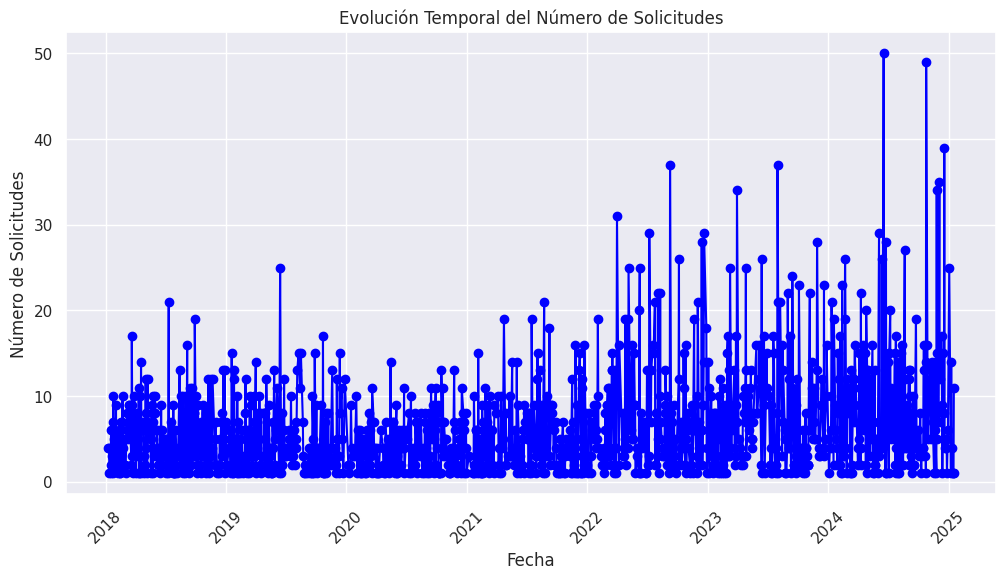

In [ ]:
df['FECHA'] = df['FECHA_DE_AUTORIZACIÓN'].dt.date
solicitudes_diarias = df.groupby('FECHA').size()

plt.figure(figsize=(12, 6))
plt.plot(solicitudes_diarias.index, solicitudes_diarias.values, marker='o', linestyle='-', color='blue')
plt.title('Evolución Temporal del Número de Solicitudes')
plt.xlabel('Fecha')
plt.ylabel('Número de Solicitudes')
plt.xticks(rotation=45)
plt.show()

##**Comparación de cantidad solicitada por tipo de solicitud**

En el boxplot de la izquierda se puede observar que las solicitudes de medicamentos para más de un paciente tienen valores extremos y mucho mayores que la mediana, mientras que las solicitudes para paciente específico y urgencia clínica tienen valores bastante bajos y pocos outliers.

El violin plot de la derecha muestra con más detalle cómo la mayoría de las solicitudes son de valores bajos, pero se puede observar una cola alargada que indica solicitudes extremadamente grandes que ocurren ocasionalmente.

Esta situación puede deberse a solicitudes de cobertura amplia realizadas por hospitales o clínicas para abastecer a múltiples pacientes en campañas de vacunación o de tratamientos para enfermedades de alto riesgo o impacto, como nos enfrentamos a una crisis como la pandemia del COVID-19. Se realizaron pedidos de cantidades extraordinarias de medicamentos. También puede deberse a la compra al por mayor de medicamentos para tratamientos específicos o de alto coste individual.

###**Identificación de la Distribución**

   - **Boxplot**:
     - La mayoría de los datos para "Más de un paciente" están concentrados cerca de valores bajos, pero existen valores atípicos (outliers) muy grandes, superando las 300,000 solicitudes.
     - Las categorías "Paciente específico" y "Urgencia clínica" tienen distribuciones mucho más compactas, con muy pocos valores atípicos.

   - **Violin Plot**:
     - La distribución para "Más de un paciente" muestra una densidad alta cerca de 0 y una cola larga hacia valores altos. Esto refuerza la idea de una **distribución sesgada a la derecha**.
     - "Paciente específico" y "Urgencia clínica" tienen distribuciones mucho más estrechas, con densidad predominantemente en valores bajos.

  **Conclusión**: La categoría "Más de un paciente" domina en términos de variabilidad y valores extremos.

###**Relacion entre variables**
- **"Más de un paciente"**: Muestra alta variabilidad y presencia de valores extremos, lo que indica que esta categoría puede abarcar una amplia gama de situaciones.
- **"Paciente específico" y "Urgencia clínica"**: Parecen tener comportamientos similares, con distribuciones mucho más controladas y concentradas en valores bajos.

<ipython-input-15-5ad1ae7aa766>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='TIPO_DE_SOLICITUD', y='CANTIDAD_SOLICITADA', palette="Blues")
<ipython-input-15-5ad1ae7aa766>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='TIPO_DE_SOLICITUD', y='CANTIDAD_SOLICITADA', palette="Oranges", inner="quartile")


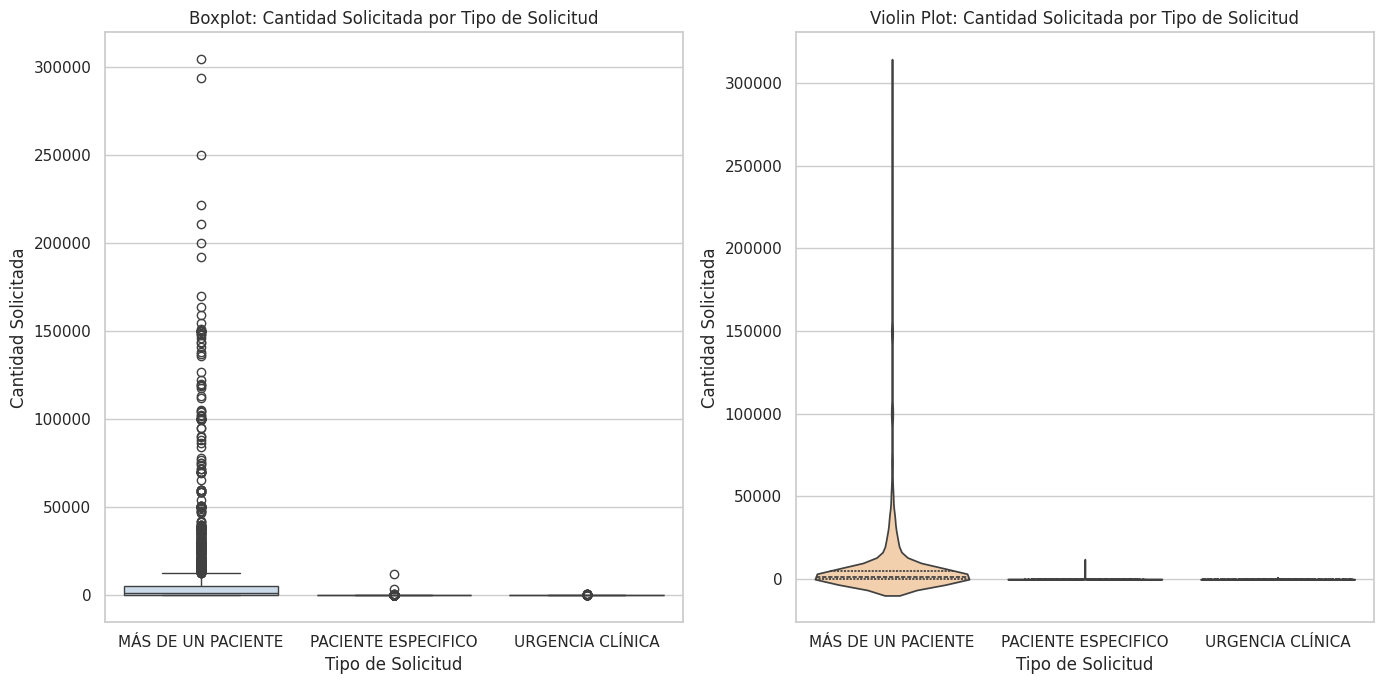

In [ ]:
# @title
sns.set(style="whitegrid")

plt.figure(figsize=(14, 7))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='TIPO_DE_SOLICITUD', y='CANTIDAD_SOLICITADA', palette="Blues")
plt.title('Boxplot: Cantidad Solicitada por Tipo de Solicitud')
plt.xlabel('Tipo de Solicitud')
plt.ylabel('Cantidad Solicitada')

# Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='TIPO_DE_SOLICITUD', y='CANTIDAD_SOLICITADA', palette="Oranges", inner="quartile")
plt.title('Violin Plot: Cantidad Solicitada por Tipo de Solicitud')
plt.xlabel('Tipo de Solicitud')
plt.ylabel('Cantidad Solicitada')

plt.tight_layout()
plt.show()

##**Proporción de tipos de solicitud**

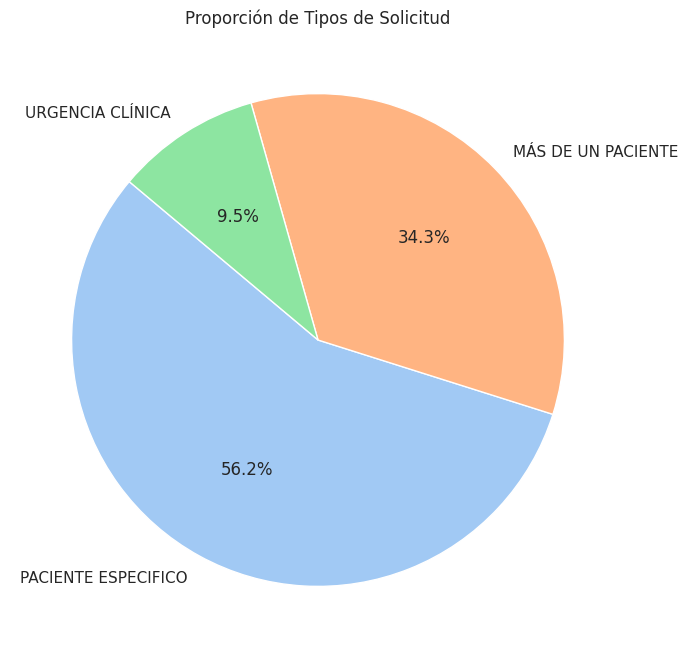

In [ ]:
# @title
plt.figure(figsize=(8, 8))
tipo_solicitud = df['TIPO_DE_SOLICITUD'].value_counts()
plt.pie(tipo_solicitud, labels=tipo_solicitud.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proporción de Tipos de Solicitud')
plt.show()

##**Distribución de la cantidad solicitada**

###**Identificación de la Distribución**

La grafica de esta distribucion nos sugiere que podria estar asociada a una distribucion exponencial o una log-normal, a pesar de no haber sido vista en clase esta se asemeja debido a su cola larga hacia la derecha del plano demostrando que las solicitudes de cantidades altas son poco frecuentes pero que si existen dentro de los datos, junto con que la gran mayoria de las observaciiones estan concentradas en valores bajos.

   - La gráfica muestra un histograma de frecuencias y una curva de densidad para las cantidades solicitadas más altas (10% superior).
   - La distribución es claramente **sesgada a la derecha**, con la mayoría de los valores concentrados por debajo de 50,000.

###**Relacion entre variables**

El eje X de la grafica nos muestra las **Cantidades Solicitadas** dentro del rango del percentil más alto, mientras que el eje Y nos muestra la frecuecia de estas solicitudes, representando el número de observaciones dentro de cada rango de cantidades solicitadas.

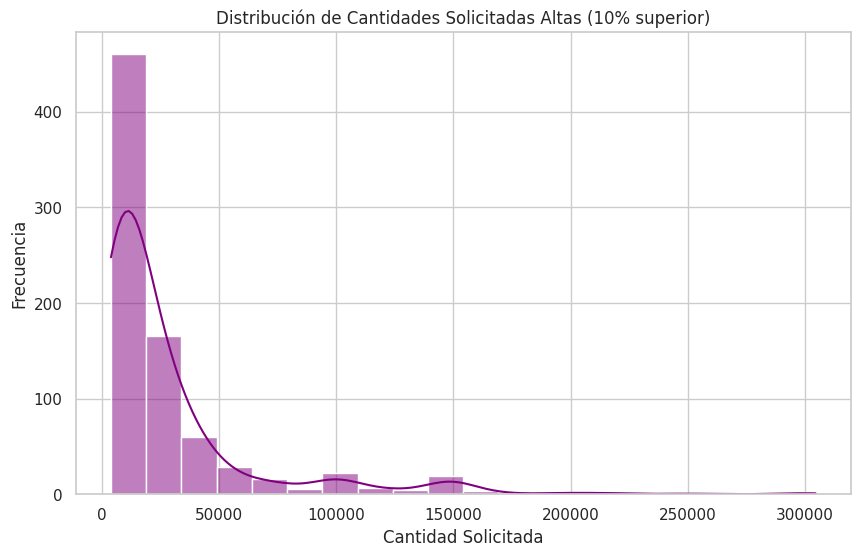

In [ ]:
# @title
plt.figure(figsize=(10, 6))
sns.histplot(df[df['CANTIDAD_SOLICITADA'] > df['CANTIDAD_SOLICITADA'].quantile(0.9)]['CANTIDAD_SOLICITADA'],
             bins=20, kde=True, color='purple')
plt.title('Distribución de Cantidades Solicitadas Altas (10% superior)')
plt.xlabel('Cantidad Solicitada')
plt.ylabel('Frecuencia')
plt.show()
#la que se ve mas alta llega hasta los 9000 de frecuencia

##**Medicamentos mas solicitados (segun su nombre comercial)**

La escasez de estos medicamentos puede ser explicada debido a factores como:

- **Alta demanda**: Medicamentos como el **Cyclofem** y **Pisacaína 2%** son bastantes comunes como anticonceptivos y anestesicos lo que lleva a una alta demanda en el sistema de salud.

- **Regulaciones**: El Instituto Nacional de Vigilancia de Medicamentos y Alimentos (Invima) ha enfrentado un gran retraso en la aprobación de registros sanitarios, lo que retrasa la disponibilidad de ciertos medicamentos.

- **Dependencia de importaciones**: Colombia depende en gran medida de medicamentos e insumos médicos importados. Esta dependencia hace que el sistema sea vulnerable a interrupciones globales, como las causadas por la pandemia de COVID-19, y a fluctuaciones en los costos internacionales

- **Problemas financieros**: Los retrasos en los pagos del gobierno a las EPS han limitado su capacidad para adquirir medicamentos, especialmente los de alto costo.

- **Medicamentos especializados**: Algunos productos como Enoxatech-40 o Leucovorin pueden ser especializados y usados en tratamientos menos comunes, pero críticos, como quimioterapia o anticoagulación. Esto genera demanda puntual y dificultad para mantener inventarios estables.

- **Problemas en la distribucion**: Movilizaciones sociales y problemas logísticos, como el paro de camioneros en los últimos años, han interrumpido la cadena de suministro, dificultando aún más la llegada de medicamentos a los centros de salud

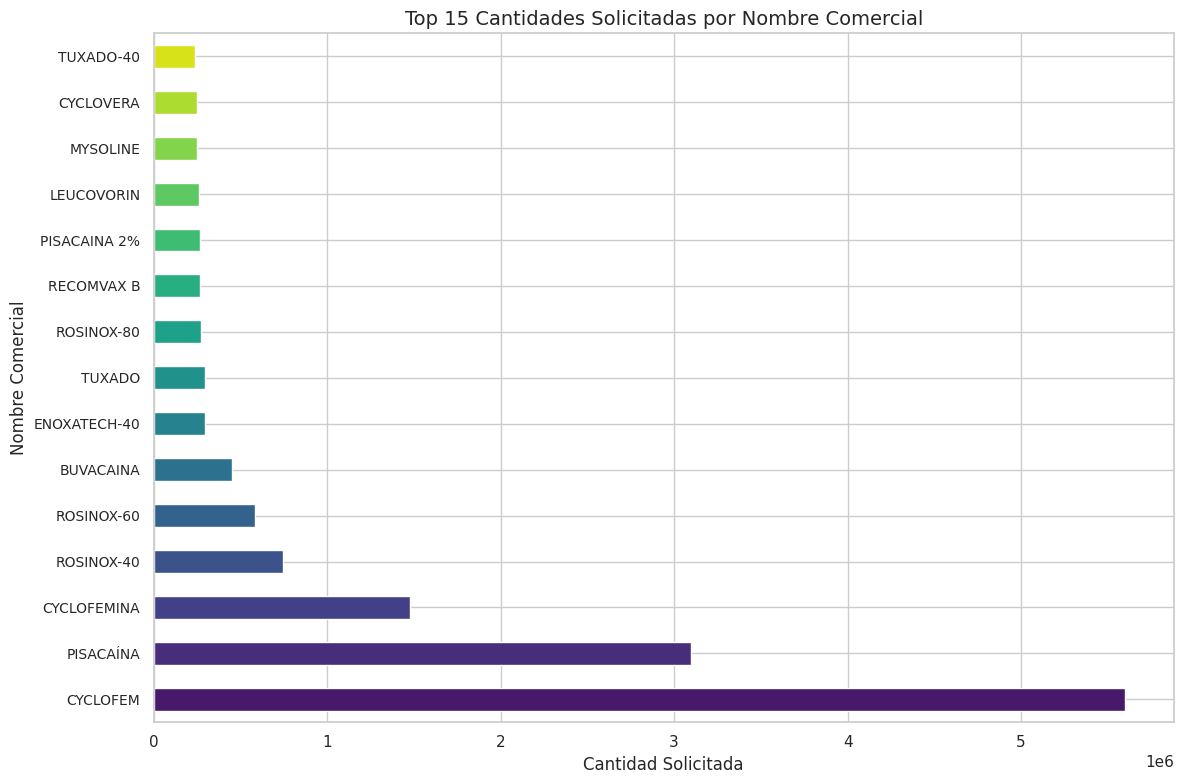

In [ ]:
# @title
df_filtered = df[df['NOMBRE_COMERCIAL_'] != 'NO REPORTADO']
grouped_data = df_filtered.groupby('NOMBRE_COMERCIAL_')['CANTIDAD_SOLICITADA'].sum()
top_10_records = grouped_data.sort_values(ascending=False).head(15)

# Configurar el gráfico
plt.figure(figsize=(12, 8))
colors = sns.color_palette("viridis", len(top_10_records))  # Usar una paleta de colores
bars = top_10_records.plot(kind='barh', color=colors)

# Ajustar nombres largos en el eje Y
plt.yticks(
    bars.get_yticks(),  # Usar ticks actuales
    [label[:30] + "..." if len(label) > 30 else label for label in top_10_records.index],  # Etiquetas truncadas
    fontsize=10
)

# Añadir etiquetas y título
plt.title('Top 15 Cantidades Solicitadas por Nombre Comercial', fontsize=14)
plt.xlabel('Cantidad Solicitada', fontsize=12)
plt.ylabel('Nombre Comercial', fontsize=12)

# Optimizar diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()

##**Principios activos:**
Aqui podemos vizualizar cuales son los principios activos dentro de los medicamentos mas frecuentes en los registros del dataset. Algunos posibles factores que podrían explicar por qué estos principios activos destacan son:

- Algunos principios activos como el Ataluren o Elexacaftor/Tezacaftor/Ivacaftor, suelen estar asociados a enfermedades raras o huérfanas (como fibrosis quística o distrofia muscular de Duchenne), son críticos para poblaciones específicas y tienen menor disponibilidad debido a su alto costo o baja producción.

- Medicamentos como las Inmunoglobulinas humanas requieren procesos de fabricación especializados, lo que puede limitar la oferta global y generar dificultades para satisfacer la demanda.

- Algunos de estos medicamentos son de alto costo, como el Tolvalptán (que es usado en tratamientos para ciertas enfermedades renales), lo que puede hacer que las entidades públicas o privadas los excluyan de sus inventarios.

- Algunos medicamentos, como los extractos alérgicos o terapias específicas como el 177Lu Cloruro, podrían tener baja demanda local debido a que las patologías asociadas son poco frecuentes. Esto puede desincentivar a las farmacéuticas a ofrecerlos en mercados pequeños como lo es Colombia.

- Algunos de estos principios activos, como el Eteplirsen, pueden haber sido aprobados recientemente en mercados internacionales y aún no estar ampliamente disponibles en Colombia.

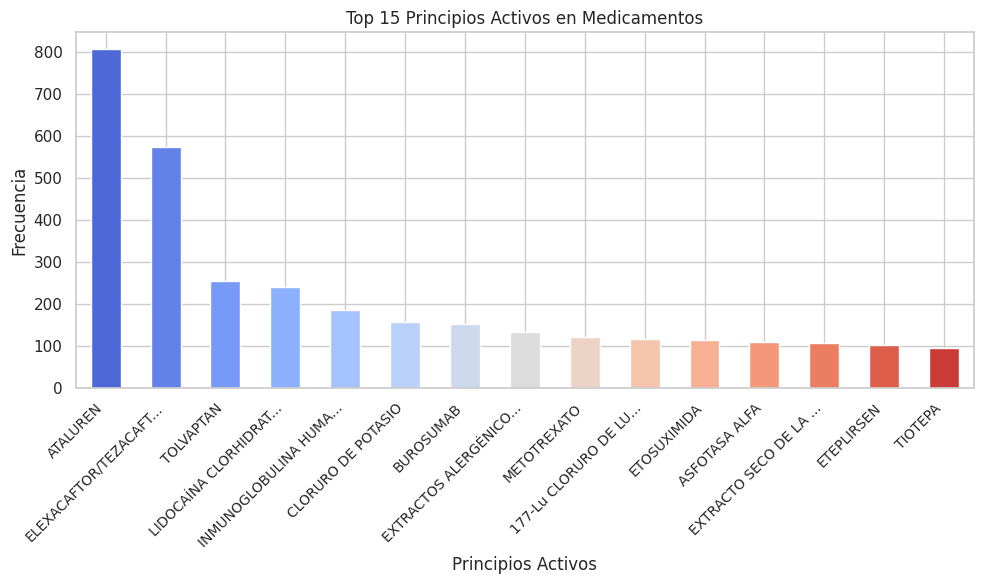

In [ ]:
# @title
principios_activos_frecuencia = df['PRINCIPIO_ACTIVO1'].value_counts().head(15)

# Crear una paleta de colores únicos
colors = sns.color_palette("coolwarm", len(principios_activos_frecuencia))

# Configurar el gráfico
plt.figure(figsize=(10, 6))
bars = principios_activos_frecuencia.plot(
    kind='bar',
    color=colors,
    title='Top 15 Principios Activos en Medicamentos'
)

# Ajustar nombres en el eje X
plt.xticks(
    bars.get_xticks(),  # Usar los ticks actuales
    [label[:20] + "..." if len(label) > 20 else label for label in principios_activos_frecuencia.index],  # Etiquetas truncadas
    rotation=45,
    ha='right',
    fontsize=10
)

# Añadir etiquetas de ejes
plt.xlabel('Principios Activos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Optimizar el diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()

##**Frecuencia de las formas farmacéuticas**

### ¿Por qué las formas farmacéuticas más frecuentes son estas?

- **Tabletas y cápsulas**: Son las formas más comunes debido a su facilidad de administración. Se pueden tomar por vía oral, son fáciles de transportar y almacenar, y no requieren de equipos especiales para su administración.
Soluciones inyectables: A pesar de requerir una técnica de administración más especializada, son muy utilizadas en entornos hospitalarios y clínicas, especialmente para la administración de medicamentos de acción rápida o cuando se requiere una concentración precisa del fármaco.
Estabilidad del fármaco:

- **Polvos para reconstituir**: Muchos fármacos son inestables en solución durante largos períodos. Por esta razón, se formulan como polvos liofilizados o granulados que se reconstituyen justo antes de su administración, asegurando así la máxima eficacia y seguridad del medicamento.
Características del paciente:

- **Pacientes pediátricos**: En el caso de los niños, las suspensiones orales y los jarabes son formas farmacéuticas comunes, ya que suelen ser más fáciles de administrar y tienen sabores agradables que facilitan su aceptación.
Pacientes geriátricos: En personas mayores, las formas farmacéuticas de liberación prolongada pueden ser más convenientes, ya que requieren menos dosis diarias y pueden mejorar la adherencia al tratamiento.
Naturaleza de la enfermedad:

- **Enfermedades crónicas**: Para enfermedades que requieren tratamiento a largo plazo, las formas farmacéuticas de liberación prolongada son preferibles, ya que reducen la frecuencia de dosificación y mejoran la calidad de vida del paciente.

- **Enfermedades agudas**: En casos de enfermedades agudas, las formas farmacéuticas de acción rápida, como las soluciones inyectables, pueden ser necesarias para lograr un control rápido de los síntomas.

<ipython-input-20-da92be9f2c55>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=formas_frecuencia.values, y=formas_frecuencia.index, palette="viridis")


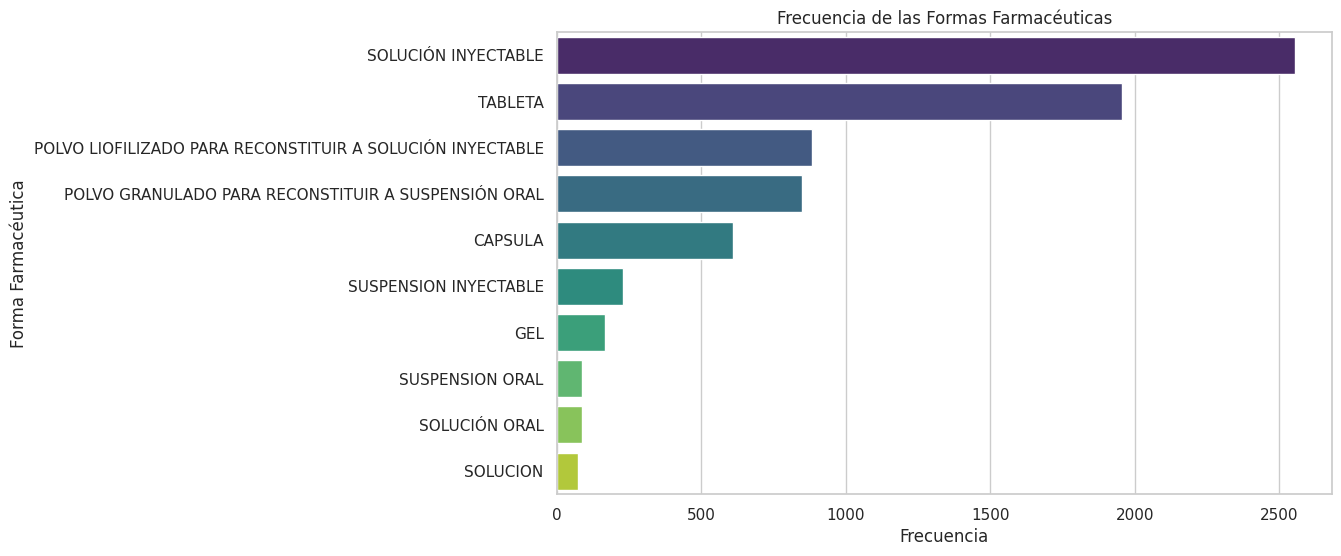

In [ ]:
# @title
plt.figure(figsize=(10, 6))
formas_frecuencia = df['FORMA_FARMACÉUTICA'].value_counts().head(10)  # Las 10 más frecuentes
sns.barplot(x=formas_frecuencia.values, y=formas_frecuencia.index, palette="viridis")
plt.title('Frecuencia de las Formas Farmacéuticas')
plt.xlabel('Frecuencia')
plt.ylabel('Forma Farmacéutica')
plt.show()

##**Solicitantes mas frecuentes**
Esta grafica nos muestra cuáles son los solicitantes o importadores que han registrado más solicitudes (que aparecen en mayor cantidad de registros dentro del dataset). Algunas de las razones por las que estos son los mayores solicitantes son las siguientes:

- **Especialización y alcance**: Estas empresas operan como actores clave en la distribución y gestión de medicamentos esenciales. Por ejemplo, Audifarma tiene un enfoque en garantizar el acceso a medicamentos a través de redes especializadas y colabora con instituciones públicas y privadas para atender a millones de pacientes, incluyendo enfermedades de alto costo y tratamientos complejos.

- **Capacidades de investigación y desarrollo**: Audifarma también invierte en investigación farmacológica y farmacovigilancia, lo que le permite identificar necesidades críticas en el acceso a medicamentos y ajustar sus operaciones para maximizar el impacto en la salud pública.

- **Cumplimiento de normativas y programas de acceso**: Empresas como Global Service Pharmaceutical están enfocadas en suplir medicamentos para enfermedades huérfanas y de alto costo, asegurando precios justos y altos estándares de servicio. Esto las convierte en proveedores confiables para medicamentos vitales no disponibles en el mercado.

- Contratos y Licitaciones Públicas: Han ganado contratos significativos con el gobierno o el sector público para suministrar medicamentos vitales, lo que impulsa su posición como principales solicitantes.

- Políticas Sanitarias Nacionales: Las normativas colombianas y programas de acceso a medicamentos esenciales han favorecido a empresas con experiencia y capacidad para manejar este tipo de productos.

- **Programas especializados y servicios de soporte**: Pisa Farmacéutica y otras empresas ofrecen productos innovadores y programas de acceso expandido que facilitan la llegada de medicamentos esenciales a comunidades con menos acceso.

###**Identificación de la Distribución**
Otra vez a pesar de no ser vista en clase es probable que la distribución de las importaciones siga una ley de Pareto o distribución de potencia, donde pocas empresas concentran una gran parte del mercado.

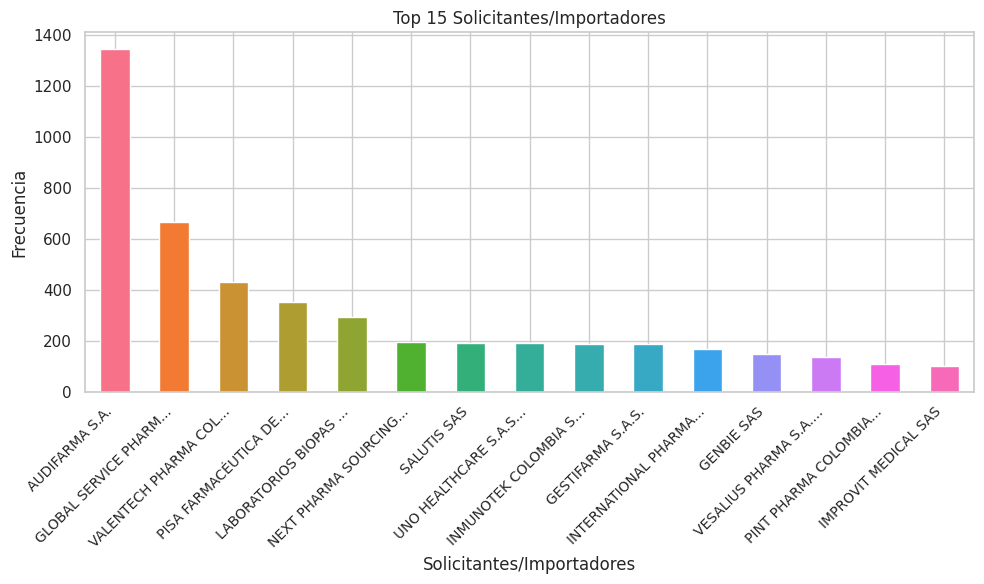

In [ ]:
# @title
# Simulación de datos
frecuencia_solicitantes = df['SOLICITANTE/IMPORTADOR'].value_counts().head(15)

# Crear una paleta de colores únicos
colors = sns.color_palette("husl", len(frecuencia_solicitantes))

# Configurar el gráfico
plt.figure(figsize=(10, 6))
bars = frecuencia_solicitantes.plot(
    kind='bar',
    color=colors,
    title='Top 15 Solicitantes/Importadores'
)

# Ajustar nombres en el eje X
plt.xticks(
    bars.get_xticks(),  # Usar los ticks actuales
    [label[:20] + "..." if len(label) > 20 else label for label in frecuencia_solicitantes.index],  # Etiquetas truncadas
    rotation=45,
    ha='right',
    fontsize=10
)

# Añadir etiquetas de ejes
plt.xlabel('Solicitantes/Importadores', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Optimizar el diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()

##**Relación entre la cantidad solicitada y el número de diagnósticos únicos por tipo de solicitud**

Esta gráfica nos muestra una relación visual entre el número de diagnósticos únicos asociados a un tipo de solicitud y la cantidad promedio solicitada para ese tipo de solicitud.

Cada punto representa un tipo de solicitud específico. La posición del punto en el gráfico indica la relación entre el número de diagnósticos únicos y la cantidad promedio solicitada para ese tipo de solicitud.

La línea de regresión intenta mostrar la tendencia general de los datos. En este caso, la línea tiene una pendiente ligeramente negativa, lo que sugiere que a medida que aumenta el número de diagnósticos únicos, la cantidad promedio solicitada tiende a disminuir ligeramente. Sin embargo, esta tendencia no es muy fuerte y la dispersión de los puntos es bastante grande.

###**Relacion entre variables**

La gráfica sugiere que no hay una relación lineal muy fuerte entre el número de diagnósticos únicos y la cantidad promedio solicitada. Es decir, el hecho de que haya muchos diagnósticos diferentes asociados a un tipo de solicitud no necesariamente implica que se solicite una mayor cantidad.

###**Limitaciones**
La cantidad promedio solicitada probablemente esté influenciada por otros factores además del número de diagnósticos únicos, como la gravedad de los diagnósticos, la población a la que va dirigida la solicitud, etc.

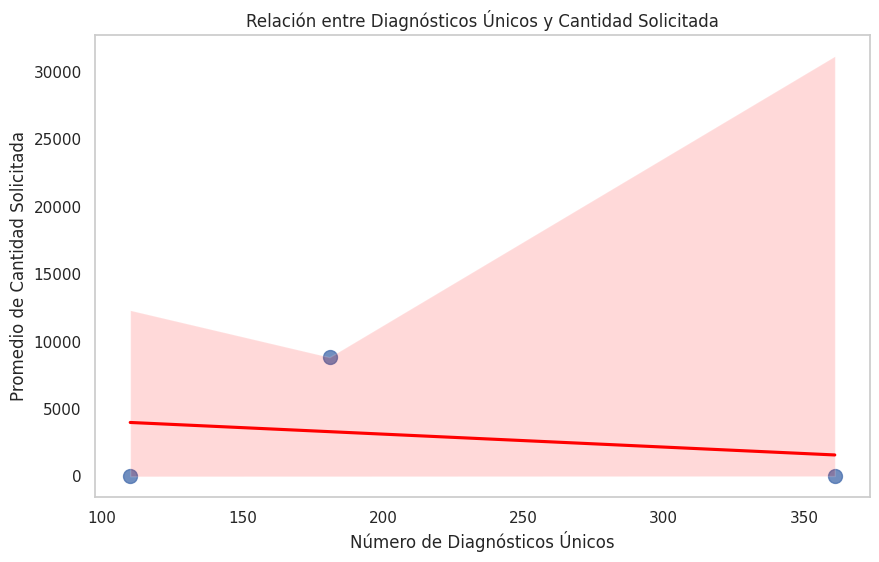

In [ ]:
# @title
# Calcular número de diagnósticos únicos y promedio de cantidad por tipo de solicitud
diagnosticos_unicos = df.groupby('TIPO_DE_SOLICITUD')['DIAGNOSTICO_CIE-1NO REPORTA'].nunique()
promedio_cantidad = df.groupby('TIPO_DE_SOLICITUD')['CANTIDAD_SOLICITADA'].mean()

# Crear un DataFrame para graficar
df_diagnosticos = pd.DataFrame({
    'Diagnosticos Únicos': diagnosticos_unicos,
    'Promedio Cantidad Solicitada': promedio_cantidad
}).reset_index()

# Gráfico de dispersión con regresión
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_diagnosticos,
    x='Diagnosticos Únicos',
    y='Promedio Cantidad Solicitada',
    scatter_kws={'s': 100},
    line_kws={'color': 'red'}
)
plt.title('Relación entre Diagnósticos Únicos y Cantidad Solicitada')
plt.xlabel('Número de Diagnósticos Únicos')
plt.ylabel('Promedio de Cantidad Solicitada')
plt.grid()
plt.show()

In [ ]:
df.head()

,FECHA_DE_AUTORIZACIÓN,TIPO_DE_SOLICITUD,SOLICITANTE/IMPORTADOR,IUM,PRINCIPIO_ACTIVO1,PRINCIPIO_ACTIVO2,FORMA_FARMACÉUTICA,NOMBRE_COMERCIAL_,CANTIDAD_SOLICITADA,PRESENTACIÓN_COMERCIAL,DIAGNOSTICO_CIE-1NO REPORTA,CÓDIGO_DIAGNOSTICO_CIE-10,FECHA
0,2025-01-17 05:00:00,MÁS DE UN PACIENTE,BLAU FARMACÉUTICA COLOMBIA SAS,1H1046221002100,HIDROXICARBAMIDA (HIDROXIUREA),NO APLICA,CAPSULA,NO REPORTADO,785.0,CAJAS X 100 CÁPSULAS,LEUCEMIA MONOCITICA CRONICA,C931,2025-01-17
1,2025-01-17 05:00:00,MÁS DE UN PACIENTE,BLAU FARMACÉUTICA COLOMBIA SAS,1H1046221002100,HIDROXICARBAMIDA (HIDROXIUREA),NO APLICA,CAPSULA,NO REPORTADO,805.0,CAJAS X 100 CÁPSULAS,LEUCEMIA MONOCITICA CRONICA,C931,2025-01-17
2,2025-01-17 05:00:00,MÁS DE UN PACIENTE,BLAU FARMACÉUTICA COLOMBIA SAS,1H1046221002100,HIDROXICARBAMIDA (HIDROXIUREA),NO APLICA,CAPSULA,NO REPORTADO,821.0,CAJAS X 100 CÁPSULAS,LEUCEMIA MONOCITICA CRONICA,C931,2025-01-17
3,2025-01-17 05:00:00,MÁS DE UN PACIENTE,BLAU FARMACÉUTICA COLOMBIA SAS,1H1046221002100,HIDROXICARBAMIDA (HIDROXIUREA),NO APLICA,CAPSULA,NO REPORTADO,723.0,CAJAS X 100 CÁPSULAS,LEUCEMIA MONOCITICA CRONICA,C931,2025-01-17
4,2025-01-17 05:00:00,MÁS DE UN PACIENTE,BLAU FARMACÉUTICA COLOMBIA SAS,1H1046221002100,HIDROXICARBAMIDA (HIDROXIUREA),NO APLICA,CAPSULA,NO REPORTADO,775.0,CAJAS X 100 CÁPSULAS,LEUCEMIA MONOCITICA CRONICA,C931,2025-01-17


##Creación de variables objetivo para el Machine Learning

##Modelos de clasificación

Este primer modelo se centra en clasificar si un medicamento falta o no, esta forma es facil de explicar, puesto que representa la probabilidad que tiene un medicamento de no estar disponible, esto podria tener los siguientes usos:


*   Activar alertas automáticas para hacer pedidos urgentes.
*   Notificar a autoridades o farmacias que algo va a faltar.

Sin embargo, este mismo tendría la desventaja de no poder saber que tan grave es la falta de este medicamento, lo que podría impedir una planificación mejor.




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Agrupar por diagnóstico y principio activo para contar repeticiones
grouped = df.groupby(["CÓDIGO_DIAGNOSTICO_CIE-10", "PRINCIPIO_ACTIVO1"]).size().reset_index(name="repeticiones")
df = df.merge(grouped, on=["CÓDIGO_DIAGNOSTICO_CIE-10", "PRINCIPIO_ACTIVO1"])

# Combinar principios activos si existe un segundo
df["PRINCIPIO_ACTIVO_COMBINADO"] = df["PRINCIPIO_ACTIVO1"] + " & " + df["PRINCIPIO_ACTIVO2"].fillna("")

umbral = df["CANTIDAD_SOLICITADA"].quantile(0.50)
df["NO_DISPONIBLE"] = ((df["repeticiones"] > 3) & (df["CANTIDAD_SOLICITADA"] > umbral)).astype(int)

# Selección de características
features = df[[
    "TIPO_DE_SOLICITUD",
    "PRINCIPIO_ACTIVO_COMBINADO",
    "FORMA_FARMACÉUTICA",
    "CÓDIGO_DIAGNOSTICO_CIE-10",
    "CANTIDAD_SOLICITADA",
]]

# Codificación de variables categóricas
X = pd.get_dummies(features)

# Variable objetivo
y = df["NO_DISPONIBLE"]

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train shape', X_train.shape)
print('X_test shape', y_test.shape)

X_trainRF, X_testRF, y_trainRF, y_testRF = X_train, X_test, y_train, y_test
X_trainNS, X_testNS, y_trainNS, y_testNS = X_train, X_test, y_train, y_test

X_train shape (6404, 1143)
X_test shape (1602,)


### Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9650436953807741
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       927
           1       0.94      0.98      0.96       675

    accuracy                           0.97      1602
   macro avg       0.96      0.97      0.96      1602
weighted avg       0.97      0.97      0.97      1602



###  Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(class_weight='balanced',random_state=42)
rf.fit(X_trainRF, y_trainRF)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_testRF, y_pred_rf))

Random Forest Accuracy: 0.9650436953807741
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       927
           1       0.93      0.99      0.96       675

    accuracy                           0.97      1602
   macro avg       0.96      0.97      0.96      1602
weighted avg       0.97      0.97      0.97      1602



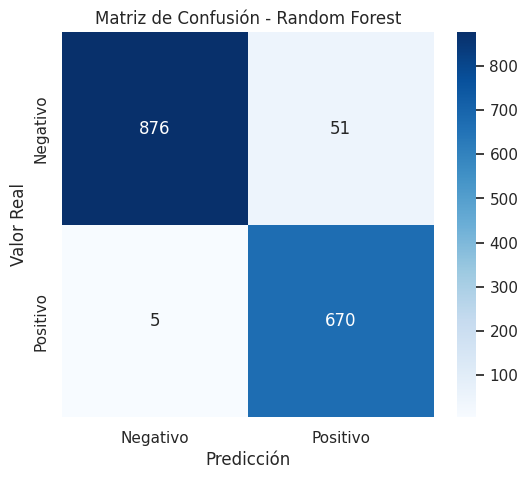

In [ ]:
# Obtener la matriz de confusión
cm = confusion_matrix(y_testRF, y_pred_rf)

# Etiquetas para los ejes
labels = ['Negativo', 'Positivo']  # Cambia si tus clases son otras

# Visualización con seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()


### Support Vector Machine

In [ ]:
#@title Support Vector Classifier (SVC)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC(random_state=42)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)

print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

SVC Accuracy: 0.8732833957553059
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       927
           1       0.86      0.83      0.85       675

    accuracy                           0.87      1602
   macro avg       0.87      0.87      0.87      1602
weighted avg       0.87      0.87      0.87      1602



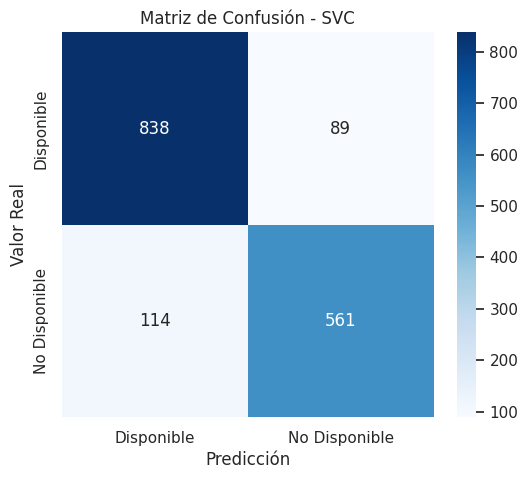

In [ ]:
#@title Matriz de confusión resultante

# Obtener la matriz de confusión para el modelo SVC
cm = confusion_matrix(y_test, y_pred_svc)

# Etiquetas para los ejes
labels = ['Disponible', 'No Disponible']

# Visualización con seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - SVC')
plt.show()

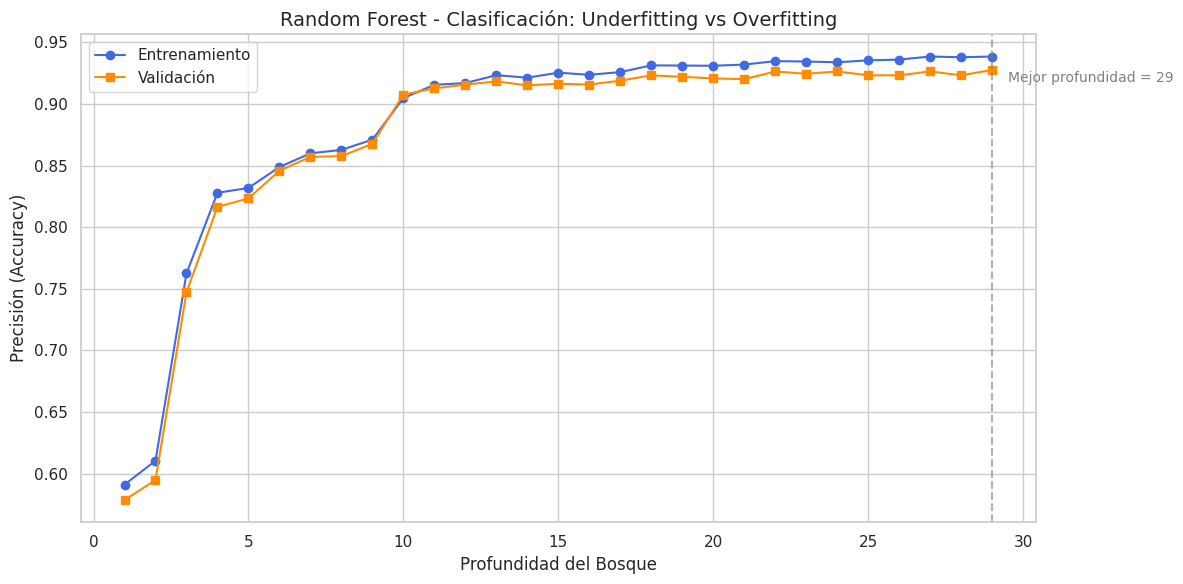

In [ ]:
# Simulación del entrenamiento
train_scores = []
test_scores = []
depths = range(1, 30)

for d in depths:
    clf = RandomForestClassifier(max_depth=d, n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    train_scores.append(train_acc)
    test_scores.append(test_acc)

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.plot(depths, train_scores, label="Entrenamiento", marker='o', color='royalblue')
plt.plot(depths, test_scores, label="Validación", marker='s', color='darkorange')

# Punto de máxima precisión de validación
best_depth = depths[test_scores.index(max(test_scores))]
best_score = max(test_scores)
plt.axvline(best_depth, color='gray', linestyle='--', alpha=0.6)
plt.text(best_depth + 0.5, best_score - 0.01, f"Mejor profundidad = {best_depth}", fontsize=10, color='gray')

# Etiquetas y estilo
plt.xlabel("Profundidad del Bosque", fontsize=12)
plt.ylabel("Precisión (Accuracy)", fontsize=12)
plt.title("Random Forest - Clasificación: Underfitting vs Overfitting", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
# Modelo base con la mejor profundidad encontrada
clf = RandomForestClassifier(max_depth=29, n_estimators=100, random_state=42)

# Validación cruzada con 5 folds
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

# Resultados
print("Accuracy por fold:", cv_scores)
print("Accuracy promedio (CV):", np.mean(cv_scores))
print("Desviación estándar:", np.std(cv_scores))

Accuracy por fold: [0.93676815 0.91881343 0.92505855 0.92974239 0.91875   ]
Accuracy promedio (CV): 0.9258265027322403
Desviación estándar: 0.006854249516935854


## Modelos de regresión

Mientras el modelo de regresión determina si un medicamento estará disponible o no, el de regresión se aplica solo cuando se detecta una falta.

Su objetivo es estimar la gravedad del desabastecimiento, por el número de unidades faltantes. Así, se permite priorizar los casos más críticos y tomar decisiones más informadas.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error

# Variable objetivo: CANTIDAD_SOLICITADA (regresión)
y = df["CANTIDAD_SOLICITADA"]

In [ ]:
#@title Decision Tree Regressor (DTR)

from sklearn.model_selection import KFold

mae_scorer = make_scorer(mean_absolute_error)
mse_scorer = make_scorer(mean_squared_error)

# Usamos cross_val_score para validación cruzada con 5 folds
dtr = DecisionTreeRegressor(random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = cross_val_score(dtr, X, y, cv=kf, scoring=mae_scorer)
mse_scores = cross_val_score(dtr, X, y, cv=kf, scoring=mse_scorer)

print(" Decision Tree Regressor (DTR)")
print(f"MAE promedio: {mae_scores.mean():.2f} ± {mae_scores.std():.2f}")
print(f"MSE promedio: {mse_scores.mean():.2f} ± {mse_scores.std():.2f}")

 Decision Tree Regressor (DTR)
MAE promedio: 50.91 ± 39.27
MSE promedio: 2050283.51 ± 2864385.89


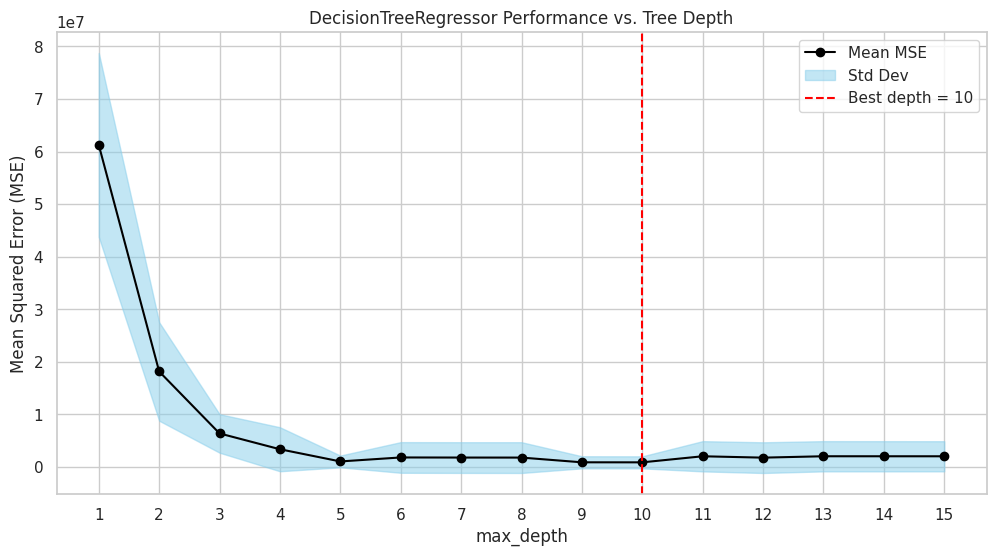

In [ ]:
#@title Decision Tree Regressor (DTR) - Comparativa para diferentes depths

# Rango de profundidades a evaluar
means, stds = [], []
depths = range(1, 16)

# Evaluación de cada profundidad
for d in depths:
  est = DecisionTreeRegressor(max_depth=d, random_state=42)
  scores = cross_val_score(est, X, y, cv=kf, scoring=mse_scorer)
  means.append(np.mean(scores))
  stds.append(np.std(scores))

means = np.array(means)
stds = np.array(stds)

# Encontrar la profundidad con el MSE mínimo
best_idx = np.argmin(means)
best_depth = depths[best_idx]
best_mse = means[best_idx]

# Grafico
plt.figure(figsize=(12, 6))
plt.plot(depths, means, label="Mean MSE", color="black", marker='o')
plt.fill_between(depths, means - stds, means + stds, color="skyblue", alpha=0.5, label="Std Dev")
plt.axvline(x=best_depth, color='red', linestyle='--', label=f"Best depth = {best_depth}")
plt.xlabel("max_depth")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("DecisionTreeRegressor Performance vs. Tree Depth")
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#@title Modelo Decision Tree Regressor con la mejor profundidad

reg = DecisionTreeRegressor(max_depth=10, random_state=42)
mae_scores = cross_val_score(reg, X, y, cv=kf, scoring=mae_scorer)
mse_scores = cross_val_score(reg, X, y, cv=kf, scoring=mse_scorer)

print(" Decision Tree Regressor (DTR - max_depth=10)")
print(f"MAE promedio: {mae_scores.mean():.2f} ± {mae_scores.std():.2f}")
print(f"MSE promedio: {mse_scores.mean():.2f} ± {mse_scores.std():.2f}")

 Decision Tree Regressor (DTR - max_depth=10)
MAE promedio: 42.31 ± 26.17
MSE promedio: 899300.97 ± 1145168.30


In [ ]:
#@title Random Forest Regressor (RFR)

# Usamos cross_val_score para validación cruzada con 5 folds

rf = RandomForestRegressor(random_state=42)
mae_scores = cross_val_score(rf, X, y, cv=kf, scoring=mae_scorer)
mse_scores = cross_val_score(rf, X, y, cv=kf, scoring=mse_scorer)

print(" Random Forest Regressor (RFR)")
print(f"MAE promedio: {mae_scores.mean():.2f} ± {mae_scores.std():.2f}")
print(f"MSE promedio: {mse_scores.mean():.2f} ± {mse_scores.std():.2f}")

 Random Forest Regressor (RFR)
MAE promedio: 44.84 ± 42.13
MSE promedio: 1841891.65 ± 3164847.05


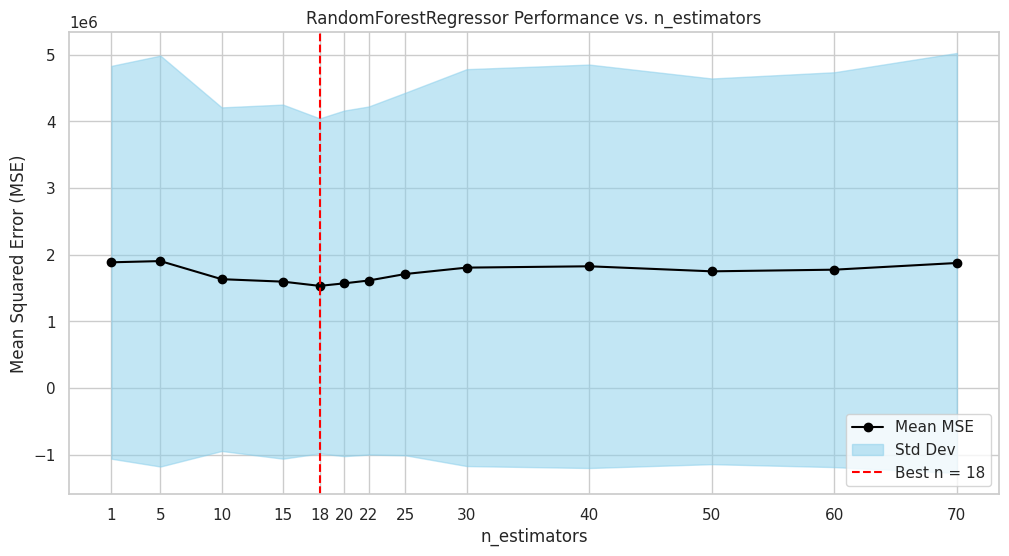

In [ ]:
#@title Random Forest Regressor (FTR) - Comparativa para diferentes n_stimators

# Lista de estimadores a evaluar
n_estimators_list = [1, 5, 10, 15, 18, 20, 22, 25, 30, 40, 50, 60, 70]
means, stds = [], []

# Entrenamiento y evaluación
for n in n_estimators_list:
    rf = RandomForestRegressor(n_estimators=n, random_state=42, n_jobs=-1)
    scores = cross_val_score(rf, X, y, cv=kf, scoring=mse_scorer)
    means.append(np.mean(scores))
    stds.append(np.std(scores))

means = np.array(means)
stds = np.array(stds)

# Encontrar el número óptimo de estimadores (menor MSE)
best_idx = np.argmin(means)
best_n = n_estimators_list[best_idx]
best_mse = means[best_idx]

# Gráfico
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_list, means, label="Mean MSE", color="black", marker='o')
plt.fill_between(n_estimators_list, means - stds, means + stds, color="skyblue", alpha=0.5, label="Std Dev")
plt.axvline(x=best_n, color='red', linestyle='--', label=f"Best n = {best_n}")
plt.xlabel("n_estimators")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("RandomForestRegressor Performance vs. n_estimators")
plt.xticks(n_estimators_list)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#@title Random Forest Regressor con el mejor n_estimators

reg = RandomForestRegressor(n_estimators=18, random_state=42)
mae_scores = cross_val_score(reg, X, y, cv=kf, scoring=mae_scorer)
mse_scores = cross_val_score(reg, X, y, cv=kf, scoring=mse_scorer)

print(" Random Forest Regressor (RFR - n_estimators=18)")
print(f"MAE promedio: {mae_scores.mean():.2f} ± {mae_scores.std():.2f}")
print(f"MSE promedio: {mse_scores.mean():.2f} ± {mse_scores.std():.2f}")

 Random Forest Regressor (RFR - n_estimators=18)
MAE promedio: 42.97 ± 38.39
MSE promedio: 1531272.40 ± 2512613.54


In [ ]:
#@title Support Vector Regressor (SVR) Comparativa para diferentes kernels
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Tipos de kernel
types = ['rbf', 'linear', 'poly']
means = []
stds = []

for kernel_type in types:
    est = make_pipeline(StandardScaler(), SVR(kernel=kernel_type))
    mse_scores = cross_val_score(est, X, y, cv=kf, scoring=mse_scorer)
    mae_scores = cross_val_score(est, X, y, cv=kf, scoring=mae_scorer)
    means.append(np.mean(mse_scores))
    stds.append(np.std(mse_scores))
    print(f" Support Vector Regressor (SVR - kernel='{kernel_type}')")
    print(f"MAE promedio: {mae_scores.mean():.2f} ± {mae_scores.std():.2f}")
    print(f"MSE promedio: {mse_scores.mean():.2f} ± {mse_scores.std():.2f}")
    print('-' * 50)

# Para graficar correctamente con etiquetas de texto
x = np.arange(len(types))

plt.figure(figsize=(8, 5))
plt.plot(x, means, label="Mean MSE", color="black", marker='o')
plt.fill_between(x, np.array(means) - np.array(stds), np.array(means) + np.array(stds),
                 color="blue", alpha=0.5, label="Std Dev")
plt.xticks(x, types)
plt.xlabel("Kernel Type")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("SVR Performance with Different Kernels")
plt.legend()
plt.grid(True)
plt.show()

KeyboardInterrupt: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 128120792.0000 - val_loss: 3838420.7500
Epoch 2/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 682356.3750 - val_loss: 394.7513
Epoch 3/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 250.2635 - val_loss: 187.5328
Epoch 4/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 257.5786 - val_loss: 12.6938
Epoch 5/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 17.1764 - val_loss: 1962.2748
Epoch 6/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 695.8928 - val_loss: 3.8828
Epoch 7/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.9949 - val_loss: 1.4962
Epoch 8/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0238 - val_loss: 2.7582
Epoch 9/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.7878 - val_loss: 1.9765
Epoch 10/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9289 - val_loss: 1.0404
Epoch 11/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 411.0117 - val_loss: 123.6087
Epoch 12/50
20

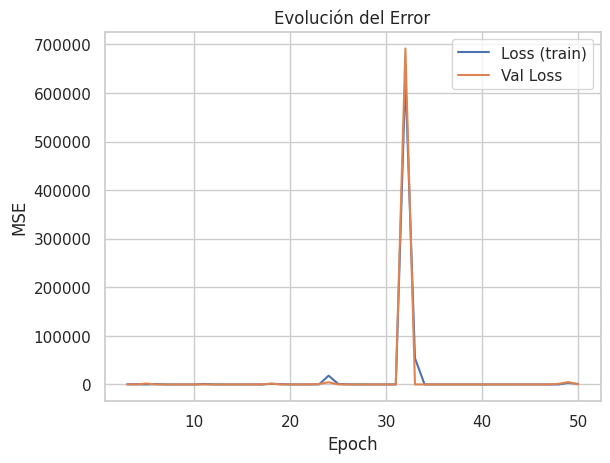

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 Deep Neural Network (DNN)
MAE promedio: 0.97 ± 0.71
MSE promedio: 22.88 ± 37.06


In [ ]:
#@title Deep Neural Network (DNN)

from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Construcción del modelo como función
def build_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')
    return model

# División de datos para entrenamiento y validación (para la gráfica)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo para mostrar curva de pérdida
model = build_model()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Mostrar curva de pérdida (desde epoch 3 para evitar ruido inicial)
loss = history.history['loss'][2:]
val_loss = history.history['val_loss'][2:]
epochs = range(3, 51)

plt.plot(epochs, loss, label='Loss (train)')
plt.plot(epochs, val_loss, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Evolución del Error')
plt.legend()
plt.grid(True)
plt.show()

# Validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
mae_scores = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model = build_model()
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    y_pred = model.predict(X_val).flatten()

    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)

    mse_scores.append(mse)
    mae_scores.append(mae)

mse_scores = np.array(mse_scores)
mae_scores = np.array(mae_scores)

print(" Deep Neural Network (DNN)")
print(f"MAE promedio: {mae_scores.mean():.2f} ± {mae_scores.std():.2f}")
print(f"MSE promedio: {mse_scores.mean():.2f} ± {mse_scores.std():.2f}")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8006 entries, 0 to 8005
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   FECHA_DE_AUTORIZACIÓN        8006 non-null   datetime64[ns]
 1   TIPO_DE_SOLICITUD            8006 non-null   object        
 2   SOLICITANTE/IMPORTADOR       8003 non-null   object        
 3   IUM                          8003 non-null   object        
 4   PRINCIPIO_ACTIVO1            8006 non-null   object        
 5   PRINCIPIO_ACTIVO2            7987 non-null   object        
 6   FORMA_FARMACÉUTICA           7972 non-null   object        
 7   NOMBRE_COMERCIAL_            8002 non-null   object        
 8   CANTIDAD_SOLICITADA          8006 non-null   float64       
 9   PRESENTACIÓN_COMERCIAL       7971 non-null   object        
 10  DIAGNOSTICO_CIE-1NO REPORTA  8006 non-null   object        
 11  CÓDIGO_DIAGNOSTICO_CIE-10    8006 non-null 

##T-SNE

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


df = df.drop(columns=["FECHA", "FECHA_DE_AUTORIZACIÓN", "NOMBRE_COMERCIAL_", "SOLICITANTE/IMPORTADOR"])

# Separar tipos de columnas
cat_cols = df.select_dtypes(include=["object"]).columns
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Preprocesamiento
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols)
])

# Aplicar transformación
X = preprocessor.fit_transform(df)

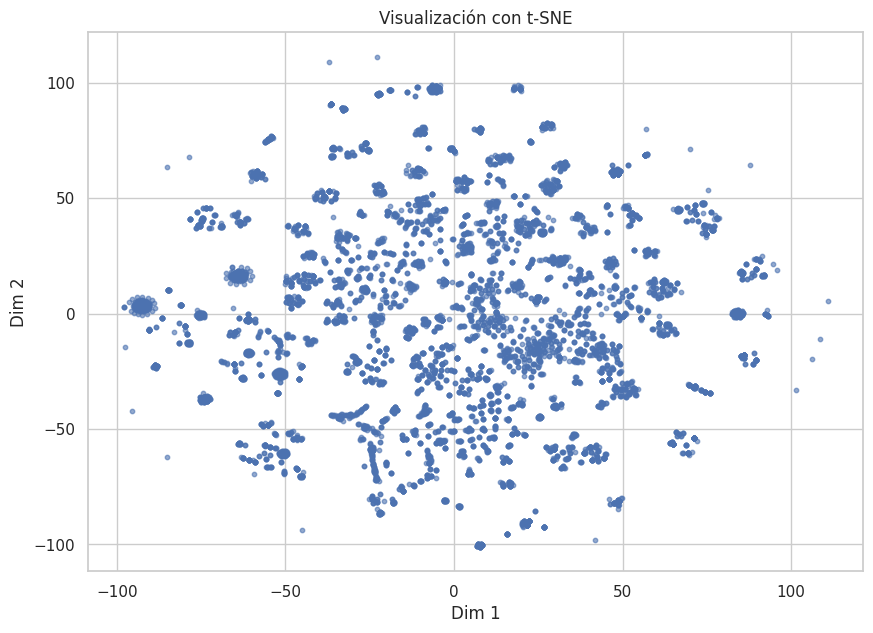

In [ ]:

tsne = TSNE(n_components=2, perplexity=30, random_state=42, init="random")
X_tsne = tsne.fit_transform(X)


plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.6, s=10)
plt.title("Visualización con t-SNE")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.show()

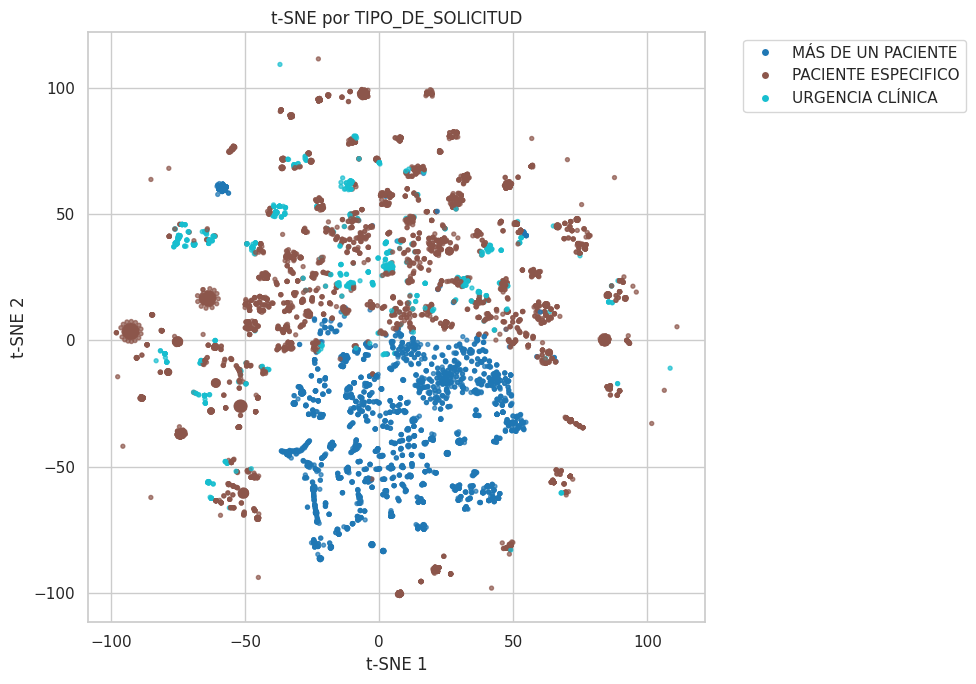

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

labels = df["TIPO_DE_SOLICITUD"].astype("category")
label_codes = labels.cat.codes
label_names = labels.cat.categories

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=label_codes, cmap="tab10", s=8, alpha=0.7)
plt.title("t-SNE por TIPO_DE_SOLICITUD")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)


legend_labels = label_names
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=6)
           for i, label in enumerate(legend_labels)]
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
y = df["NO_DISPONIBLE"]
X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

clf = SVC(kernel='rbf', class_weight='balanced', random_state=42)
clf.fit(X_train_tsne, y_train_tsne)

y_pred_tsne = clf.predict(X_test_tsne)

print("SVC Accuracy Accuracy:", accuracy_score(y_test_tsne, y_pred_tsne))
print(classification_report(y_testRF, y_pred_tsne))



SVC Accuracy Accuracy: 0.8938826466916354
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       927
           1       0.87      0.88      0.87       675

    accuracy                           0.89      1602
   macro avg       0.89      0.89      0.89      1602
weighted avg       0.89      0.89      0.89      1602



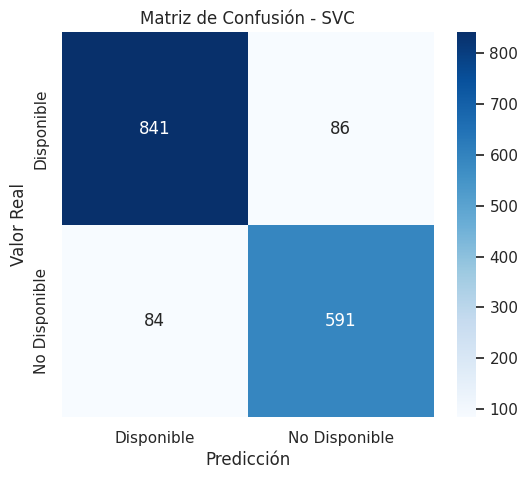

In [ ]:
#@title Matriz de confusión resultante

# Obtener la matriz de confusión para el modelo SVC
cm = confusion_matrix(y_test_tsne, y_pred_tsne)

# Etiquetas para los ejes
labels = ['Disponible', 'No Disponible']

# Visualización con seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - SVC')
plt.show()

## Principal Component Analysis - (PCA)

n_components=5 -> Accuracy promedio: 0.7890
n_components=50 -> Accuracy promedio: 0.8235
n_components=100 -> Accuracy promedio: 0.8182
n_components=200 -> Accuracy promedio: 0.8371
n_components=300 -> Accuracy promedio: 0.8403
n_components=400 -> Accuracy promedio: 0.8468
n_components=500 -> Accuracy promedio: 0.8521
n_components=600 -> Accuracy promedio: 0.8543
n_components=700 -> Accuracy promedio: 0.8643
n_components=800 -> Accuracy promedio: 0.8668
n_components=900 -> Accuracy promedio: 0.8785
n_components=1000 -> Accuracy promedio: 0.8930
n_components=1100 -> Accuracy promedio: 0.7915


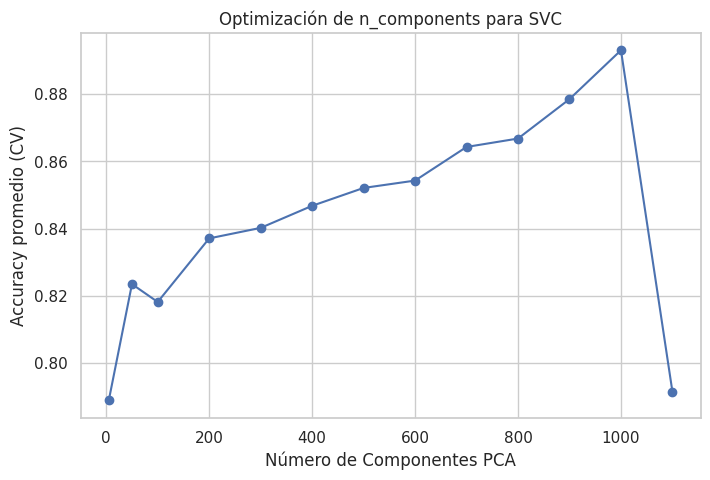

In [ ]:
#@title Hallar Nº de componentes adecuados

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.decomposition import PCA

# Normalizar antes de PCA
scaler = StandardScaler()
X_trainNS_scaled = scaler.fit_transform(X_trainNS)
X_testNS_scaled = scaler.transform(X_testNS)

# Rango de valores a probar
componentes = [5, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]

scores = []
for n in componentes:
    pipeline = Pipeline([
        ('pca', PCA(n_components=n, whiten=True)),
        ('svc', SVC(kernel='rbf', class_weight='balanced', random_state=42))
    ])
    score = cross_val_score(pipeline, X_trainNS_scaled, y_trainNS, cv=5, scoring='accuracy')
    scores.append(score.mean())
    print(f'n_components={n} -> Accuracy promedio: {score.mean():.4f}')

# Gráfico de resultados
plt.figure(figsize=(8, 5))
plt.plot(componentes, scores, marker='o')
plt.xlabel('Número de Componentes PCA')
plt.ylabel('Accuracy promedio (CV)')
plt.title('Optimización de n_components para SVC')
plt.grid(True)
plt.show()

In [ ]:
#@title PCA con Support Vector Classifier (SVC)

from sklearn.decomposition import PCA
from sklearn.svm import SVC

print('X_test shape antes de PCA:', X_testNS.shape)

# PCA
pca = PCA(n_components=1000, whiten=True)
pca.fit(X_trainNS_scaled)
x_pca_train = pca.transform(X_trainNS_scaled)
x_pca_test = pca.transform(X_testNS_scaled)
print('X_test shape despues de PCA:', x_pca_test.shape)

# Modelo SVC
svc = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svc.fit(x_pca_train, y_trainNS)
y_pred = svc.predict(x_pca_test)

# Imprimir varianza total explicada acumulada
explained_var = pca.explained_variance_ratio_
total_var = explained_var.sum()
print(f"Varianza total de los componentes: {total_var:.4f}")

# Evaluación
print("SVC Accuracy:", accuracy_score(y_testNS, y_pred))
print(classification_report(y_testNS, y_pred))

X_test shape antes de PCA: (1602, 1143)
X_test shape despues de PCA: (1602, 1000)
Varianza total de los componentes: 1.0000
SVC Accuracy: 0.9019975031210986
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       927
           1       0.91      0.85      0.88       675

    accuracy                           0.90      1602
   macro avg       0.90      0.90      0.90      1602
weighted avg       0.90      0.90      0.90      1602



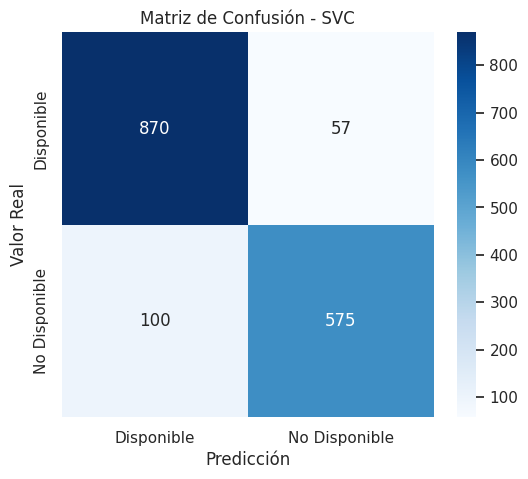

In [ ]:
#@title Matriz de confusión resultante

# Obtener la matriz de confusión para el modelo SVC
cm = confusion_matrix(y_testNS, y_pred)

# Etiquetas para los ejes
labels = ['Disponible', 'No Disponible']

# Visualización con seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - SVC')
plt.show()

#**Referencias Bibliograficas**
***Formato APA***

1. Banco Mundial. (2022). *Progresos y desafíos en las políticas de salud en Colombia*. Recuperado de [https://documents1.worldbank.org/curated/en/099100008112213954/pdf/P1778690006d1407e0b85c006837522a50a.pdf](https://documents1.worldbank.org/curated/en/099100008112213954/pdf/P1778690006d1407e0b85c006837522a50a.pdf)

2. Semana. (s.f.). *El progreso de las políticas públicas de salud en Colombia*. Recuperado de [https://www.semana.com/economia/opinion/articulo/el-progreso-de-las-politicas-publicas-de-salud-en-colombia/202151/](https://www.semana.com/economia/opinion/articulo/el-progreso-de-las-politicas-publicas-de-salud-en-colombia/202151/)

3. El País. (2023, 11 de marzo). *La escasez de medicamentos: un espejo de la pelea por la reforma a la salud*. Recuperado de [https://elpais.com/america-colombia/2023-03-11/la-escasez-de-medicamentos-un-espejo-de-la-pelea-por-la-reforma-a-la-salud.html](https://elpais.com/america-colombia/2023-03-11/la-escasez-de-medicamentos-un-espejo-de-la-pelea-por-la-reforma-a-la-salud.html)

4. Periódico UNAL. (s.f.). *El desabastecimiento de medicamentos en Colombia y el rol de varios sectores en esta problemática*. Recuperado de [https://periodico.unal.edu.co/articulos/el-desabastecimiento-de-medicamentos-en-colombia-y-el-rol-de-varios-sectores-en-esta-problematica](https://periodico.unal.edu.co/articulos/el-desabastecimiento-de-medicamentos-en-colombia-y-el-rol-de-varios-sectores-en-esta-problematica)

5. Semana. (2024). *Escasez de medicamentos en Colombia: una crisis sin soluciones de corto plazo*. Recuperado de [https://www.semana.com/economia/macroeconomia/articulo/escasez-de-medicamentos-en-colombia-una-crisis-sin-soluciones-de-corto-plazo/202402/](https://www.semana.com/economia/macroeconomia/articulo/escasez-de-medicamentos-en-colombia-una-crisis-sin-soluciones-de-corto-plazo/202402/)

6. Semana. (2023). *¿Por qué hay escasez de medicamentos en Colombia? Estas son las 8 razones que le detalló el Invima al Congreso*. Recuperado de [https://www.semana.com/politica/articulo/por-que-hay-escasez-de-medicamentos-en-colombia-estas-son-las-8-razones-que-le-detallo-el-invima-al-congreso/202339/](https://www.semana.com/politica/articulo/por-que-hay-escasez-de-medicamentos-en-colombia-estas-son-las-8-razones-que-le-detallo-el-invima-al-congreso/202339/)


7. PiSA Farmacéutica de Colombia. (n.d.). *Página oficial de PiSA Farmacéutica*. Recuperado de [https://pisa.net.co](https://pisa.net.co)

8. Infobae. (2024, 17 de octubre). Audifarma ya no entregará medicamentos a la Nueva EPS: alrededor de 2,5 millones de sus afiliados se verían afectados. Recuperado de [https://www.infobae.com/colombia/2024/10/17/audifarma-ya-no-entregara-medicamentos-a-la-nueva-eps-alrededor-de-25-millones-de-sus-afiliados-se-verian-afectados/](https://www.infobae.com/colombia/2024/10/17/audifarma-ya-no-entregara-medicamentos-a-la-nueva-eps-alrededor-de-25-millones-de-sus-afiliados-se-verian-afectados/)

9. Global Service Pharmaceutical. (n.d.). *Medicamentos vitales no disponibles*. Recuperado de [https://gpharma.net](https://gpharma.net)

10. Audifarma. (2024). Audifarma y la investigación farmacéutica en Colombia. Recuperado de [https://www.audifarma.com.co/blog/sostenibilidad/audifarma-y-la-investigacion-farmaceutica-en-colombia](https://www.audifarma.com.co/blog/sostenibilidad/audifarma-y-la-investigacion-farmaceutica-en-colombia)


11. Duchenne-Spain. (n.d.). *Stop codón en distrofia muscular de Duchenne*. Recuperado de [https://www.duchenne-spain.org/distrofina/stop-codo](https://www.duchenne-spain.org/distrofina/stop-codo)

12. GPnotebook. (n.d.). *Ataluren para el tratamiento de distrofia muscular de Duchenne con una mutación sin sentido en el gen de la distrofina*. Recuperado de [https://gpnotebook.com/es/pages/neurologia/ataluren-para-el-tratamiento-de-distrofia-muscular-de-duchenne-con-una-mutacion-sin-sentido-en-el-gen-de-la-distrofina](https://gpnotebook.com/es/pages/neurologia/ataluren-para-el-tratamiento-de-distrofia-muscular-de-duchenne-con-una-mutacion-sin-sentido-en-el-gen-de-la-distrofina)

13. INVIMA (2024).Listado de abastecimiento y desabastecimiento de medicamentos en seguimiento - Noviembre 2024 [https://www.invima.gov.co/sites/default/files/medicamentos-productos-biologicos/Desabastecimientos/2024/Establecimientos/listado_de_abastecimiento_y_desabastecimiento_de_medicamentos_en_seguimiento_noviembre_de_2024_publicado.pdf](https://www.invima.gov.co/sites/default/files/medicamentos-productos-biologicos/Desabastecimientos/2024/Establecimientos/listado_de_abastecimiento_y_desabastecimiento_de_medicamentos_en_seguimiento_noviembre_de_2024_publicado.pdf)

